In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from dataRead import *
from Functions import *

In [2]:
def regFun(x,gam,mu,A):
    sig = 18e-12 + 9e-12 + 10e-12
    f = A*np.exp(gam / 8 * (4 * mu + gam * sig ** 2 - 4 * x)) * np.sqrt(gam) / 2 * (
        sc.special.erfc(np.sqrt(1/sig ** 2)*(2 * mu + gam * sig **2 - 2 * x)/(2*np.sqrt(2)))
    )
    #f /= np.max(f)
    return f

def photonFun(x,gam,x0,sig):
    #sig = 18e-12 + 9e-12 + 10e-12
    f =  1/2 * np.exp(gam / 2 * ( gam * sig ** 2 - 2 * x + 2 * x0)) * gam * (
        sc.special.erfc((gam * sig **2 - x + x0)/(np.sqrt(2)*sig))
    )
    f /= np.sqrt(Overlap(f,f,x))
    return f

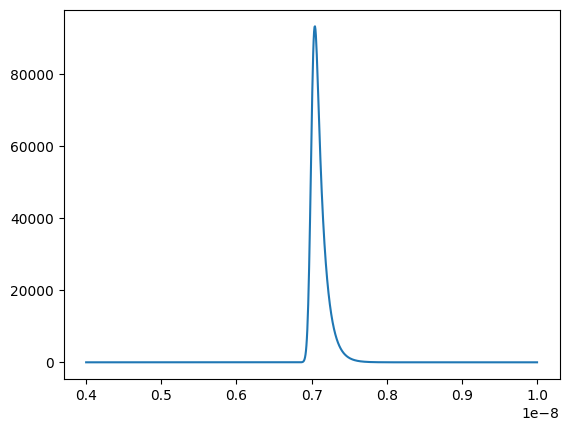

In [3]:
x = np.linspace(4e-9,10e-9,1000)
gamTest = 1e10
muTest = 7000e-12
x0Test = 7e-9
ATest = 1e-5
sigTest = 37e-12

plt.plot(x,photonFun(x,gamTest,x0Test,sigTest))

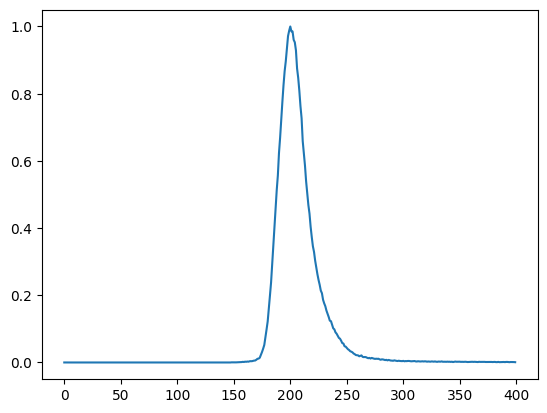

In [4]:
time, env1, env2,delay, table = xpRead('./acquired_data/xp_00/data.json')
idx = np.argmax(env1)
interestingRange = [idx-200,idx+200]
plt.plot(env1[interestingRange[0]:interestingRange[1]])

0.9999999999999999


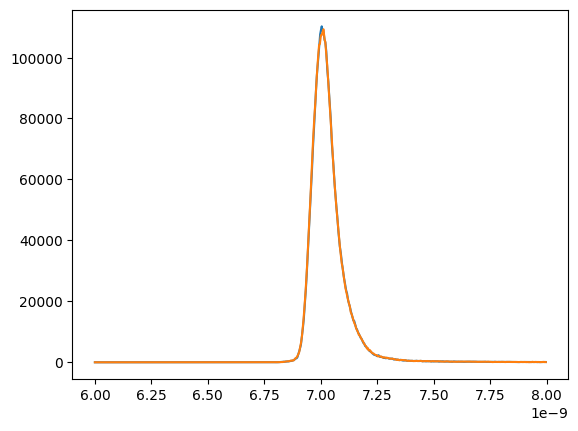

In [5]:
realEnv1 = np.array(env1[1500:2000],dtype = 'float64')
realTime = np.array(time[1500:2000],dtype = 'float64')
exTime = np.linspace(realTime[0],realTime[-1],10000)/1e12
realEnv2 = np.array(env2[1500:2000],dtype = 'float64')

realEnv2Interp = np.interp(exTime,realTime/1e12,realEnv2)
realEnv1Interp = np.interp(exTime,realTime/1e12,realEnv1)
realEnv1Interp /= np.sqrt(Overlap(realEnv1Interp,realEnv1Interp,exTime))
realEnv2Interp /= np.sqrt(Overlap(realEnv2Interp,realEnv2Interp,exTime))
print(Overlap(realEnv1Interp,realEnv1Interp,exTime))
plt.plot(exTime,realEnv1Interp)
plt.plot(exTime,realEnv2Interp)


In [6]:
""" popt1, pcov1 = sc.optimize.curve_fit(Fun,exTime,realEnv1Interp,p0 = [gamTest,muTest,ATest])
popt2,pcov2 = sc.optimize.curve_fit(regFun,exTime,realEnv2Interp,p0 = [gamTest,muTest,ATest])
print(popt1,pcov1)
print(popt2,pcov2) """

' popt1, pcov1 = sc.optimize.curve_fit(Fun,exTime,realEnv1Interp,p0 = [gamTest,muTest,ATest])\npopt2,pcov2 = sc.optimize.curve_fit(regFun,exTime,realEnv2Interp,p0 = [gamTest,muTest,ATest])\nprint(popt1,pcov1)\nprint(popt2,pcov2) '

In [7]:
popt1, pcov1 = sc.optimize.curve_fit(photonFun,exTime,realEnv1Interp,p0 = [gamTest,x0Test,sigTest])
popt2, pcov2 = sc.optimize.curve_fit(photonFun,exTime,realEnv2Interp,p0 = [gamTest,x0Test,sigTest])
print(popt1,pcov1)
print(popt2,pcov2)

[1.86524785e+10 6.97351086e-09 3.37720698e-11] [[4.09579917e+14 4.90485123e-07 3.60765216e-07]
 [4.90485123e-07 8.34978356e-28 4.32027777e-28]
 [3.60765216e-07 4.32027777e-28 6.85830788e-28]]
[1.86579156e+10 6.97312912e-09 3.40654992e-11] [[4.00056872e+14 4.81897560e-07 3.53296937e-07]
 [4.81897560e-07 8.21480860e-28 4.25571507e-28]
 [3.53296937e-07 4.25571507e-28 6.69572110e-28]]


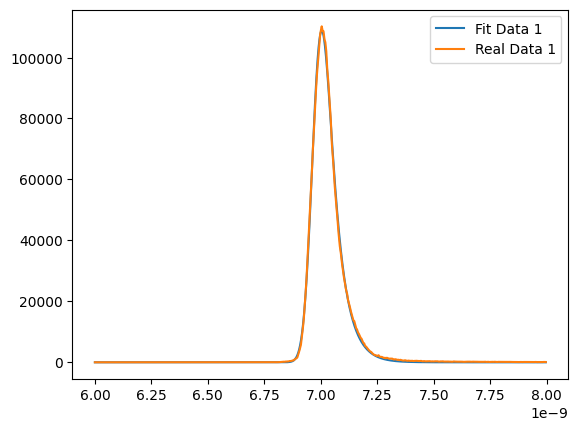

In [11]:
plt.plot(exTime,photonFun(exTime,*popt1),label = 'Fit Data 1')
#plt.plot(exTime,photonFun(exTime,*popt2),label = 'Fit Data 2')
plt.plot(exTime,realEnv1Interp,label = 'Real Data 1')
#plt.plot(exTime,realEnv2Interp,label = 'Real Data 2')
plt.legend()


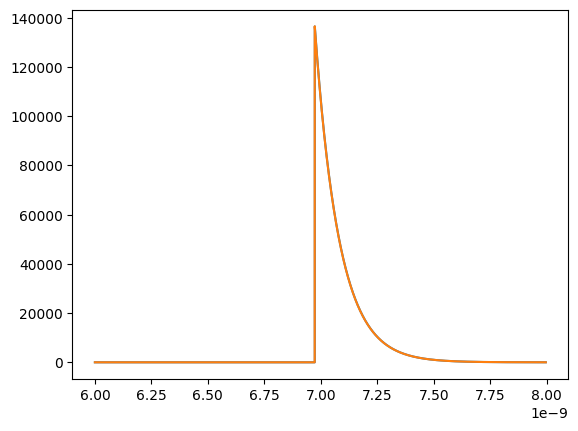

In [9]:
waves1 = Exponential(exTime-popt1[1],popt1[0])
waves2 = Exponential(exTime-popt2[1],popt2[0])
plt.plot(exTime,waves1)
plt.plot(exTime,waves2)

In [10]:
idx = np.argmax(env1)
interestingRange = [idx-200,idx+200]
print(idx)
print(interestingRange[0].dtype)

1751
int64
